# Project birds

#### Download relevant modules (astral etc)

In [1]:
conda install -c conda-forge timezonefinder

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge astral

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


#### Import relevant modules

In [3]:
from numpy import *
from matplotlib.pyplot import *
import datetime 
import pytz
from astral import *
from timezonefinder import TimezoneFinder

#### First of all: get sunrise and sunset for each day (with astral)

In [25]:
a = Astral()
location = a['Stockholm']
def sunrise(year_to_simulate, longitude, latitude):
    tf=TimezoneFinder()
    time_zone = tf.timezone_at(lng=longitude, lat=latitude)
    location.latitude = latitude
    location.longitude = longitude
    location.timezone = time_zone
    sunrise=[]
    sunset=[]
    for day in range(25, 382): # for the recorded period: 2015-01-25 to 2016-01-16
        dt = datetime.datetime(year_to_simulate, 1, 1) + datetime.timedelta(day - 1)
        dt = pytz.timezone(time_zone).localize(dt)
        sun=location.sun(dt)
        sunrise.append(sun['sunset'])
        sunset.append(sun['sunrise'])
    return sunrise,sunset
sunrise_sunset=sunrise(2015,location.longitude, location.latitude)
# sunrise_sunset[0] gives array of sunsets as datetime objects
# sunrise_sunset[1] gives array of sunrises as datetime objects

#### Initial step: Read file

In [5]:
with open('bird_jan25jan16.txt') as bird_document:
    
    date=[]
    time=[]
    movement=[]  #will contain TOTAL nr of movements

    bird_line=bird_document.readline() #a single line containing date+time+movement
    
    condition=bird_line.split() #splitting the stack of information in one line into seperate elements of a list

    while len(condition)>0: #the file is read one line at a time, until a line with no content is discovered (end of file)
    
        date.append(condition[0]) #first element of the list previosly created
        time.append(condition[1])
        movement.append(condition[2])

        bird_line=bird_document.readline() #next line is read...
        condition=bird_line.split() #...and split up


#### Date preprocessing step, 4 filters

#### Filter 1 - filter for unique values, removes unecessary data

In [6]:
date_filter_1=[]
time_filter_1=[]
movement_filter_1=[]

date_filter_1.append(date[0])
time_filter_1.append(time[0])
movement_filter_1.append(movement[0])


for i in range (0,len(date)-1):
    if movement[i] != movement[i+1]:
        
        date_filter_1.append(date[i+1])
        time_filter_1.append(time[i+1])
        movement_filter_1.append(movement[i+1])
        
print("FILTER 1 \n")
print("Size of the original list:",len(movement))
print("Size after Filter 1 was applyed:",len(movement_filter_1))       
print("Filter 1 eliminated:",len(movement)-len(movement_filter_1),"duplicates.") # tells how many duplicates where eliminated 
print("Data is now reduced to",(1-((len(movement)-len(movement_filter_1))/len(movement)))*100,"% of original size.") # tells how many duplicates where eliminated

if len(date_filter_1)==len(time_filter_1)==len(movement_filter_1):
                           print("Lists are syncronized. \n\n")
        
movement_filter_1 = [int(i) for i in movement_filter_1]



FILTER 1 

Size of the original list: 238748
Size after Filter 1 was applyed: 13002
Filter 1 eliminated: 225746 duplicates.
Data is now reduced to 5.445909494529799 % of original size.
Lists are syncronized. 




#### Filter 2 - Fill in holes of type 1 (ex 2072,72,2072)

In [7]:
for i in range (0,len(movement_filter_1)-1):
    
    if movement_filter_1[i+1]-movement_filter_1[i]<0:
        
        if movement_filter_1[i]==movement_filter_1[i+2]:
            
            movement_filter_1[i+1]=movement_filter_1[i]

date_filter_2=[]
time_filter_2=[]
movement_filter_2=[]

date_filter_2.append(date_filter_1[0])
time_filter_2.append(time_filter_1[0])
movement_filter_2.append(movement_filter_1[0])

for i in range (0,len(date_filter_1)-1):
    if movement_filter_1[i] != movement_filter_1[i+1]:
        
        date_filter_2.append(date_filter_1[i+1])
        time_filter_2.append(time_filter_1[i+1])
        movement_filter_2.append(movement_filter_1[i+1])
 
        
print("FILTER 2 \n")
print("Size of the  list after Filter 1:",len(movement_filter_1))
print("Size after Filter 2 was applyed:",len(movement_filter_2))       
print("Filter 2 eliminated:",len(movement_filter_1)-len(movement_filter_2),"duplicates.") # tells how many duplicates where eliminated 
if len(date_filter_2)==len(time_filter_2)==len(movement_filter_2):
                           print("Lists are syncronized. \n\n")

FILTER 2 

Size of the  list after Filter 1: 13002
Size after Filter 2 was applyed: 12796
Filter 2 eliminated: 206 duplicates.
Lists are syncronized. 




#### Filter 3 - Filling holes of type 2 (ex 9011,3,9013) and type 3 (ex 9901,901,9902)

In [8]:
print("FILTER 3 \n")

for i in range (0,len(movement_filter_2)-1):
    
    if movement_filter_2[i+1]-movement_filter_2[i]<0:
        
        if movement_filter_2[i]<movement_filter_2[i+2]:
            
            S_n0 = [str(digit) for digit in str(movement_filter_2[i])]
            S_n1 = [str(digit) for digit in str(movement_filter_2[i+1])]
            S_n2 = [str(digit) for digit in str(movement_filter_2[i+2])]
            
            print("S_n0=",movement_filter_2[i],"->in list form->",S_n0)           
            print("S_n1=",movement_filter_2[i+1],"->in list form->",S_n1)            
            print("S_n2=",movement_filter_2[i+2],"->in list form->",S_n2,"\n")                          
            
# Prep for Sn_0---------------------------------------------------------------- 
            meta_list_S_n0=[]
            index_S_n0=0
            posible_combinations_S_n0=len(S_n0)-(len(S_n1)-1)                    
                
            while posible_combinations_S_n0 > 0:
                combination_S_n0=""
                for j in range(index_S_n0,index_S_n0+len(S_n1)):                        
                    combination_S_n0+=S_n0[j]
                        
                meta_list_S_n0.append(combination_S_n0)
                index_S_n0+=1
                posible_combinations_S_n0-=1
                
            print(meta_list_S_n0)
                
# Prep for Sn_1---------------------------------------------------------------- 
            meta_list_S_n1=[]            
            combined_S_n1=""
            for j in range(0,len(S_n1)):
                combined_S_n1+=S_n1[j]
            meta_list_S_n1.append(combined_S_n1)
                
            print(meta_list_S_n1)
                
# Prep for Sn_2----------------------------------------------------------------               
            meta_list_S_n2=[]
            index_S_n2=0
            posible_combinations_S_n2=len(S_n2)-(len(S_n1)-1)               
                               
            while posible_combinations_S_n2 > 0:
                combination_S_n2=""
                for j in range(index_S_n2,index_S_n2+len(S_n1)):
                    combination_S_n2+=str(S_n2[j]) 
                    
                meta_list_S_n2.append(combination_S_n2)
                index_S_n2+=1
                posible_combinations_S_n2-=1
                
            print(meta_list_S_n2)  
         
            
# Point system: Awarding points for best performing alternative
            
            points_S_n0=0
            points_S_n2=0
            
            if len(S_n1)>1:
                
                for k in range(0,len(meta_list_S_n0)):                    
                    if meta_list_S_n0[k]==meta_list_S_n1[-1]:
                        points_S_n0+=1
                        
                for k in range(0,len(meta_list_S_n2)):                    
                    if meta_list_S_n2[k]==meta_list_S_n1[-1]:
                        points_S_n2+=1
                        
            if len(S_n1)==1:
                
                if meta_list_S_n1[-1]==meta_list_S_n0[-1]:
                    points_S_n0+=1
                    
                if meta_list_S_n1[-1]==meta_list_S_n2[-1]:
                    points_S_n2+=1
                    
            #judge the scoreboard
            
            if points_S_n0>points_S_n2:
                print("S_n0 wins.\n")
                movement_filter_2[i+1]=movement_filter_2[i]
            
            if points_S_n2>points_S_n0:
                print("S_n2 wins.\n")
                movement_filter_2[i+1]=movement_filter_2[i+2]
            
            if points_S_n0==points_S_n2:
                print("Same chances.\n")
                movement_filter_2[i+1]=movement_filter_2[i]
                
date_filter_3=[]
time_filter_3=[]
movement_filter_3=[]

date_filter_3.append(date_filter_2[0])
time_filter_3.append(time_filter_2[0])
movement_filter_3.append(movement_filter_2[0])

for i in range (0,len(date_filter_2)-1):
    if movement_filter_2[i] != movement_filter_2[i+1]:
        
        date_filter_3.append(date_filter_2[i+1])
        time_filter_3.append(time_filter_2[i+1])
        movement_filter_3.append(movement_filter_2[i+1])
 
        

print("Size of the  list after Filter 2:",len(movement_filter_2))
print("Size after Filter 3 was applyed:",len(movement_filter_3))       
print("Filter 3 eliminated:",len(movement_filter_2)-len(movement_filter_3),"duplicates.") # tells how many duplicates where eliminated 
if len(date_filter_3)==len(time_filter_3)==len(movement_filter_3):
                           print("Lists are syncronized. \n\n")
   

FILTER 3 

S_n0= 1260 ->in list form-> ['1', '2', '6', '0']
S_n1= 63 ->in list form-> ['6', '3']
S_n2= 1263 ->in list form-> ['1', '2', '6', '3'] 

['12', '26', '60']
['63']
['12', '26', '63']
S_n2 wins.

S_n0= 2380 ->in list form-> ['2', '3', '8', '0']
S_n1= 82 ->in list form-> ['8', '2']
S_n2= 2382 ->in list form-> ['2', '3', '8', '2'] 

['23', '38', '80']
['82']
['23', '38', '82']
S_n2 wins.

S_n0= 3351 ->in list form-> ['3', '3', '5', '1']
S_n1= 1 ->in list form-> ['1']
S_n2= 3353 ->in list form-> ['3', '3', '5', '3'] 

['3', '3', '5', '1']
['1']
['3', '3', '5', '3']
S_n0 wins.

S_n0= 3722 ->in list form-> ['3', '7', '2', '2']
S_n1= 723 ->in list form-> ['7', '2', '3']
S_n2= 3723 ->in list form-> ['3', '7', '2', '3'] 

['372', '722']
['723']
['372', '723']
S_n2 wins.

S_n0= 4689 ->in list form-> ['4', '6', '8', '9']
S_n1= 9 ->in list form-> ['9']
S_n2= 4690 ->in list form-> ['4', '6', '9', '0'] 

['4', '6', '8', '9']
['9']
['4', '6', '9', '0']
S_n0 wins.

S_n0= 7418 ->in list form-

#### Filter 4 - Detecting Arduino restart + fix

In [9]:
print("FILTER 4 \n")

counter=0 
for i in range (0,len(movement_filter_3)-1):
    
    
    if movement_filter_3[i+1]-movement_filter_3[i]<0:
        
        if  movement_filter_3[i+1]==0:
            counter=movement_filter_3[i]
        
        movement_filter_3[i+1]+=counter
        
date_filter_4=[]
time_filter_4=[]
movement_filter_4=[]

date_filter_4.append(date_filter_3[0])
time_filter_4.append(time_filter_3[0])
movement_filter_4.append(movement_filter_3[0])  

for i in range (0,len(date_filter_3)-1):
    if movement_filter_3[i] != movement_filter_3[i+1]:
        
        date_filter_4.append(date_filter_3[i+1])
        time_filter_4.append(time_filter_3[i+1])
        movement_filter_4.append(movement_filter_3[i+1])
 
        

print("Size of the  list after Filter 3:",len(movement_filter_3))
print("Size after Filter 4 was applyed:",len(movement_filter_4))       
print("Filter 4 identified:",len(movement_filter_3)-len(movement_filter_4),"resets.") # tells how many duplicates where eliminated 
if len(date_filter_4)==len(time_filter_4)==len(movement_filter_4):
                           print("Lists are syncronized. \n\n")   

FILTER 4 

Size of the  list after Filter 3: 12785
Size after Filter 4 was applyed: 12780
Filter 4 identified: 5 resets.
Lists are syncronized. 




#### Finalizaiton of preprocessing

In [10]:
movement_final=[]
movement_final.append(movement_filter_4[0])
for i in range (0,len(movement_filter_4)-1):
    if movement_filter_4[i+1]-movement_filter_4[i]<=10:
        movement_final.append(movement_filter_4[i+1]-movement_filter_4[i])
    else:
        movement_final.append(10)
        
movement_final[0]=0
date_final=date_filter_4
time_final=time_filter_4

#### Datetime, timezone

In [27]:
def datetime_timezone():
    #----------------------------SECTION 1----------------------------
        dt=[datetime.datetime.strptime(f'{date_final[n]} {time_final[n]}','%Y-%m-%d %H:%M:%S.%f') for n in range(len(date_final))]

    #----------------------------SECTION 2----------------------------
        previous_tz=pytz.timezone('Europe/London')
        local_tz=pytz.timezone('Europe/Stockholm')
        dt=[previous_tz.localize(i).astimezone(local_tz) for i in dt]
        return dt 

dt=datetime_timezone()

#### Example from funciton datetime_timezone() 

In [30]:
print(f'datetime: {dt[43]}\ndate: {dt[43].date()}\ntime: {dt[43].time()}')

datetime: 2015-01-30 09:20:05.659940+01:00
date: 2015-01-30
time: 09:20:05.659940


In [199]:
class Plot_data:
           
#---------------------------------------------PLOT DAY---------------------------------------------
    
    def plot_day(self,dt):
        jump=datetime.timedelta(days=1)
        
        #----------------------------SECTION 1----------------------------
        user_input=input('What day would you like to display? (format xxxx-xx-xx): ')
        start=datetime.datetime.strptime(user_input,'%Y-%m-%d').date()
            
        if start<dt[0].date() or start>dt[-16].date(): 
            raise Exception(f'Choose a date no earlier than {dt[0].date()} and no later than {dt[-16].date()}')
        
        #----------------------------SECTION 2----------------------------
        c=0
        while sunrise_sunset[0][c].date()!=start:
            c=c+1 
        sunrise_day=sunrise_sunset[1][c]
        sunset_day=sunrise_sunset[0][c]
        
        #----------------------------SECTION 3----------------------------
        next_day=start+jump
        s1=str(start)
        s2=str(next_day)
        
        if (s1 in date_final)==False: 
                return print(f'No registered activity on {start}')
        elif (s2 in date_final)==False:
            next_day=next_day+jump
            s2=str(next_day)
            if (s2 in date_final)==False:
                next_day=next_day+jump
                s2=str(next_day)
                    
        #----------------------------SECTION 4----------------------------
        index_start=date_final.index(s1)
        index_stop=date_final.index(s2)
        day=dt[index_start:index_stop]
        only_hours=[k.time().hour for k in day]
        begin_hour=index_start
        single_hour=[only_hours[0]]
        movement_hour=[movement_final[index_start]]
        
        for m in range(1,len(only_hours)):
            if only_hours[m]!=only_hours[m-1]:
                end_hour=index_start+m-1      
                movement_hour.append(sum(movement_final[begin_hour:end_hour]))     
                single_hour.append(only_hours[m])
                begin_hour=end_hour+1 
                
        #----------------------------SECTION 5----------------------------
        if single_hour[-1]!=23: 
            single_hour=single_hour+[23]
            movement_hour=movement_hour+[0]
            
        for j in range(24):
            if j!=single_hour[j]:
                single_hour.insert(j,j)
                movement_hour.insert(j,0) 
                
        #----------------------------SECTION 6----------------------------
        fig, ax=subplots(figsize=(20,5))
        y1=movement_hour
        x1=arange(len(movement_hour))
        x_values=[1+i for i in range(24)]
        x_values_label=[f'{itr}:00' for itr in range(1,24)]
        ax.set_xticks(x_values)
        ax.set_xticklabels(x_values_label)
        ax.set_title(f'The activity of a Taljoxe on {start}',fontsize=15)
        ax.set_ylabel('Movements per hour',fontsize=15)
        ax.set_xlabel('Time of day',fontsize=15)
        
        #----------------------------SECTION 7----------------------------
        y2=sunrise_day.time().hour+sunrise_day.time().minute/60+sunrise_day.time().second/3600
        y3=sunset_day.time().hour+sunset_day.time().minute/60+sunset_day.time().second/3600    
        ax.axvline(y2,color='yellow',label=f'sunrise {sunrise_day.time()}')
        ax.axvline(y3,color='black',label=f'sunset {sunset_day.time()}')
        ax.bar(x1,y1)
        ax.legend(loc='upper left',prop={'size':15})
        return fig

#---------------------------------------------PLOT WEEK---------------------------------------------
        
    def plot_week(self,dt):
        
    #----------------------------SECTION 1----------------------------
        user_input=input('Which day would you like the week to start from? (format xxxx-xx-xx): ')
        start=datetime.datetime.strptime(user_input,'%Y-%m-%d') 
        absolute_start=start
        start=start.date()
        if start<dt[0].date() or start>dt[-41].date(): 
             raise Exception(f'Choose a date no earlier than {dt[0].date()} and no later than {dt[-41].date()}')
        L=[0]*24
        jump=datetime.timedelta(days=1)
        c=0
        while sunrise_sunset[0][c].date()!=start:
            c=c+1 
        sunrise_week=sunrise_sunset[1][c:c+7]
        sunset_week=sunrise_sunset[0][c:c+7]
           
    #----------------------------SECTION 2----------------------------
        final_movement_hour=[]
        n=7 
        n=list(range(7))
        for i in n: 
            movement_hour=[]
            stop=start+jump
            s1=str(start)
            s2=str(stop)
            if (s1 in date_final)==False: 
                final_movement_hour=final_movement_hour+L 
            else:
                g=0
                if (s2 in date_final)==False: 
                    stop=stop+jump 
                    s2=str(stop)
                    if s2 in date_final: 
                        n.remove(n[-1])        
                        if start==(absolute_start+datetime.timedelta(days=6)).date():
                            g=0 
                        else:
                            g=1             
                    else:
                        stop=stop+jump 
                        s2=str(stop)
                        n.remove(n[-1]) 
                        n.remove(n[-1])        
                        if start==(absolute_start+datetime.timedelta(days=5)).date():
                            g=1 
                        elif start==(absolute_start+datetime.timedelta(days=6)).date():
                            g=0  
                        else:
                            g=2
                index_start=date_final.index(s1)
                index_stop=date_final.index(s2)
                day=dt[index_start:index_stop]
                only_hours=[k.time().hour for k in day]
                begin_hour=index_start
                single_hour=[only_hours[0]]
                movement_hour=[movement_final[index_start]]
                for m in range(1,len(only_hours)):
                    if only_hours[m]!=only_hours[m-1]:
                        end_hour=index_start+m-1
                        movement_hour.append(sum(movement_final[begin_hour:end_hour]))
                        single_hour.append(only_hours[m])
                        begin_hour=end_hour+1 
                if single_hour[-1]!=23: 
                    single_hour=single_hour+[23]
                    movement_hour=movement_hour+[0]
                for j in range(24):
                    if j!=single_hour[j]:
                        single_hour.insert(j,j)
                        movement_hour.insert(j,0) 
                final_movement_hour=final_movement_hour+movement_hour+L*g
            start=stop
        fig, ax=subplots(figsize=(20,5))
        y1=final_movement_hour
        x1=arange(len(final_movement_hour))
        x_values=[12+24*i for i in range(7)]
        x_values_label=[f'Day {itr+1}: {(absolute_start+datetime.timedelta(days=itr)).date()}' for itr in range(7)] 
        ax.set_xticks(x_values)
        ax.set_xticklabels(x_values_label,fontsize=12.5)
        ax.set_xticks(list(range(len(final_movement_hour))),minor=True)
        ax.set_title(f'Starting from {absolute_start.date()}: The activity of a Taljoxe over a week',fontsize=15)
        ax.set_ylabel('Movements per hour',fontsize=15)
        y2=[] 
        y3=[] 
        for s in sunrise_week:
            y2.append(s.time().hour+s.time().minute/60+s.time().second/3600)
        for s in sunset_week:
            y3.append(s.time().hour+s.time().minute/60+s.time().second/3600)
        c=0
        avg_daytime=[]
        for vr in range(len(sunrise_week)):
            difference=sunset_week[vr]-sunrise_week[vr]
            avg_daytime.append(difference)
        avg=sum(avg_daytime)/len(avg_daytime)
        avg=str(avg).split(".")[0]
        for xx in range(len(y2)):
            c=c+1
            ax.axvspan(y2[xx]+24*xx,y3[xx]+24*xx,color='yellow',alpha=0.5,label=f'Daytime, avg {avg}' if c==1 else '')
        ax.bar(x1,y1)
        ax.legend(loc='upper left',prop={'size':12})
        return fig
    
#---------------------------------------------PLOT MONTH---------------------------------------------

    def plot_month(self,dt):
    
    #----------------------------SECTION 1----------------------------
        user_input=input('Which day would you like the month to start from? (format xxxx-xx-xx): ')    
        start=datetime.datetime.strptime(user_input,'%Y-%m-%d') 
        main_heading=start    
        if start.date()<dt[0].date() or start.date()>dt[-290].date(): 
            raise Exception(f'Choose a date no earlier than {dt[0].date()} and no later than {dt[-290].date()}')
        L=[0]*24
        jump=datetime.timedelta(days=1)
        fig, ax=subplots(nrows=4,ncols=1,figsize=(13,10)) 
        
    #----------------------------SECTION 2----------------------------
        for w in range(4): 
            c=0
            final_movement_hour=[]
            absolute_start=start
            n=7 
            n=list(range(7))  
            k=0
            while sunrise_sunset[0][k].date()!=start.date():
                k=k+1 
            sunrise_week=sunrise_sunset[1][k:k+7] 
            sunset_week=sunrise_sunset[0][k:k+7]
            for i in n: 
                movement_hour=[] 
                stop=start+jump 
                s1=str(start.date())
                s2=str(stop.date())
                if (s1 in date_final)==False:
                    final_movement_hour=final_movement_hour+L
                else: 
                    g=0
                    if (s2 in date_final)==False: 
                        stop=stop+jump
                        s2=str(stop.date())
                        if s2 in date_final:
                            n.remove(n[-1]) 
                            if start.date()==(absolute_start+datetime.timedelta(days=6)).date():
                                g=0 
                            else:
                                g=1
                        else:
                            stop=stop+jump 
                            s2=str(stop.date())
                            n.remove(n[-1]) 
                            n.remove(n[-1])
                            if start.date()==(absolute_start+datetime.timedelta(days=5)).date():
                                g=1 
                            elif start.date()==(absolute_start+datetime.timedelta(days=6)).date():
                                g=0  
                            else:
                                g=2
                    index_start=date_final.index(s1)
                    index_stop=date_final.index(s2)
                    day=dt[index_start:index_stop] 
                    only_hours=[k.time().hour for k in day]
                    begin_hour=index_start
                    single_hour=[only_hours[0]]
                    movement_hour=[movement_final[index_start]]
                    for m in range(1,len(only_hours)):
                        if only_hours[m]!=only_hours[m-1]:
                            end_hour=index_start+m-1
                            movement_hour.append(sum(movement_final[begin_hour:end_hour]))
                            single_hour.append(only_hours[m])
                            begin_hour=end_hour+1 
                    if single_hour[-1]!=23: 
                        single_hour=single_hour+[23]
                        movement_hour=movement_hour+[0]
                    for j in range(24):
                        if j!=single_hour[j]:
                            single_hour.insert(j,j)
                            movement_hour.insert(j,0)
                    final_movement_hour=final_movement_hour+movement_hour+L*g
                start=stop
            start=absolute_start+datetime.timedelta(weeks=1) 
            y1=final_movement_hour
            x1=arange(len(final_movement_hour))
            x_values=[12+24*i for i in range(7)] 
            x_values_label=[f'Day {w*7+(itr+1)}: {(absolute_start+datetime.timedelta(days=itr)).date()}' for itr in range(7)]
            ax[w].set_xticks(x_values)
            ax[w].set_xticklabels(x_values_label)
            ax[w].set_xticks(list(range(len(final_movement_hour))),minor=True)
            ax[w].set_title(f'week {w+1}')
            y2=[] 
            y3=[] 
            for s in sunrise_week:
                y2.append(s.time().hour+s.time().minute/60+s.time().second/3600)
            for s in sunset_week:
                y3.append(s.time().hour+s.time().minute/60+s.time().second/3600)
            avg_daytime=[]
            for vr in range(len(sunrise_week)):
                difference=sunset_week[vr]-sunrise_week[vr]
                avg_daytime.append(difference)
            avg=sum(avg_daytime)/len(avg_daytime)
            avg=str(avg).split(".")[0]
            for xx in range(len(y2)):
                c=c+1
                ax[w].axvspan(y2[xx]+24*xx,y3[xx]+24*xx,color='yellow',alpha=0.5,label=f'Daytime, avg {avg}' if c==1 else '')
            ax[w].bar(x1,y1)
            ax[w].legend(loc='upper left')
        fig.suptitle(f'Starting from {main_heading.date()}: The activity of a Taljoxe over four weeks',fontsize=15)
        fig.text(-0.025, 0.5, 'Movements per day', va='center', rotation='vertical',fontsize=15)
        tight_layout()
        fig.subplots_adjust(top=0.92)
        return fig
    
#---------------------------------------------PLOT YEAR---------------------------------------------
    
    def plot_year(self,dt):
        L=[0]
        jump=datetime.timedelta(days=1)
        fig, ax=subplots(nrows=4,ncols=3,figsize=(13,10)) # subplots: one per month
        start=dt[0].date()
        month_year=['January','Febuary','March','April','May','June','July','August','September','October','November','December']
        
    #----------------------------SECTION 1----------------------------
        question=input('Would you like to have the values of the y-axis to be the same? yes/no: ')
    
    #----------------------------SECTION 2----------------------------
        for month_index in range(12):
            movement_month=[]
            
            while start.month==month_index+1:
                movement_day=[]
                stop=start+jump 
                s1=str(start)
                s2=str(stop)
                if (s2 in date_final)==False: 
                    stop=stop+jump
                    s2=str(stop)
                    if s2 in date_final:
                        g=1
                    else:
                        stop=stop+jump 
                        s2=str(stop)
                        g=2
                else:
                    g=0
                index_start=date_final.index(s1)
                index_stop=date_final.index(s2)
                movement_day=[sum(movement_final[index_start:index_stop])] 
                movement_month=movement_month+movement_day+L*g
                start=stop

    #----------------------------SECTION 3----------------------------
            row_counter=[0,0,0,1,1,1,2,2,2,3,3,3]
            column_counter=[0,1,2,0,1,2,0,1,2,0,1,2]
            if question=='yes':
                ax[row_counter[month_index],column_counter[month_index]].set_ylim(0,1500)
            y1=movement_month
            x1=list(range(len(y1)))
            x_values_label=['']*len(x1)
            ax[row_counter[month_index],column_counter[month_index]].set_xticks(x1)
            ax[row_counter[month_index],column_counter[month_index]].set_xticklabels(x_values_label)
            ax[row_counter[month_index],column_counter[month_index]].set_title(month_year[month_index])
            ax[row_counter[month_index],column_counter[month_index]].bar(x1,y1)
        fig.suptitle('Activity of a Taljoxe in 2015',fontsize=15)
        fig.text(-0.025, 0.5, 'Movements per day', va='center', rotation='vertical',fontsize=15)
        fig.text(0.5, -0.025, 'Day', ha='center',fontsize=15)
        tight_layout()
        fig.subplots_adjust(top=0.92)
        return fig
        

#### Add taljoxe to class Plot_data

In [200]:
taljoxe=Plot_data()

#### Plotting the bird's activity: A day

What day would you like to display? (format xxxx-xx-xx): 2015-05-01
Figure(1440x360)


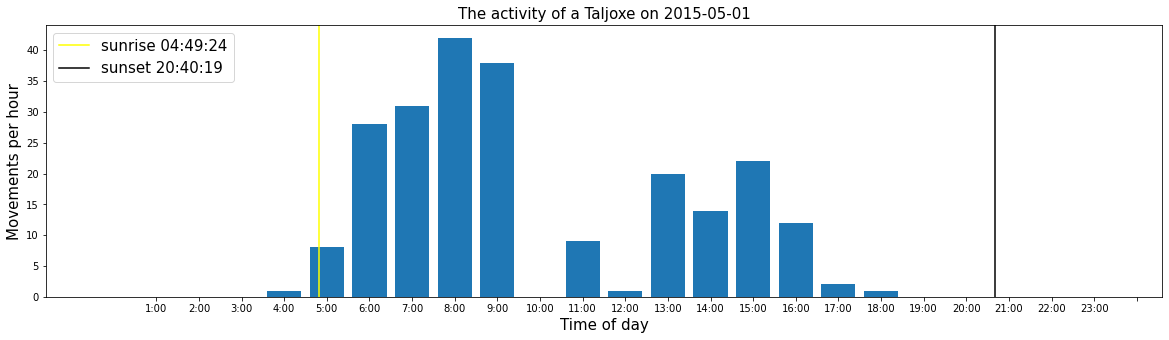

In [192]:
data=taljoxe.plot_day(dt)
print(data)

#### Plotting the bird's activity: A week

Which day would you like the week to start from? (format xxxx-xx-xx): 2015-05-01
Figure(1440x360)


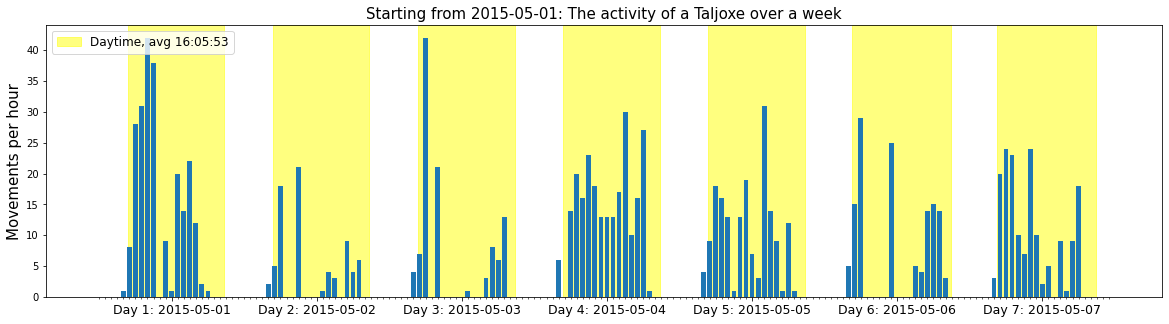

In [201]:
data=taljoxe.plot_week(dt)
print(data)

#### Plotting the bird's activity: A month

Which day would you like the month to start from? (format xxxx-xx-xx): 2015-05-01
Figure(936x720)


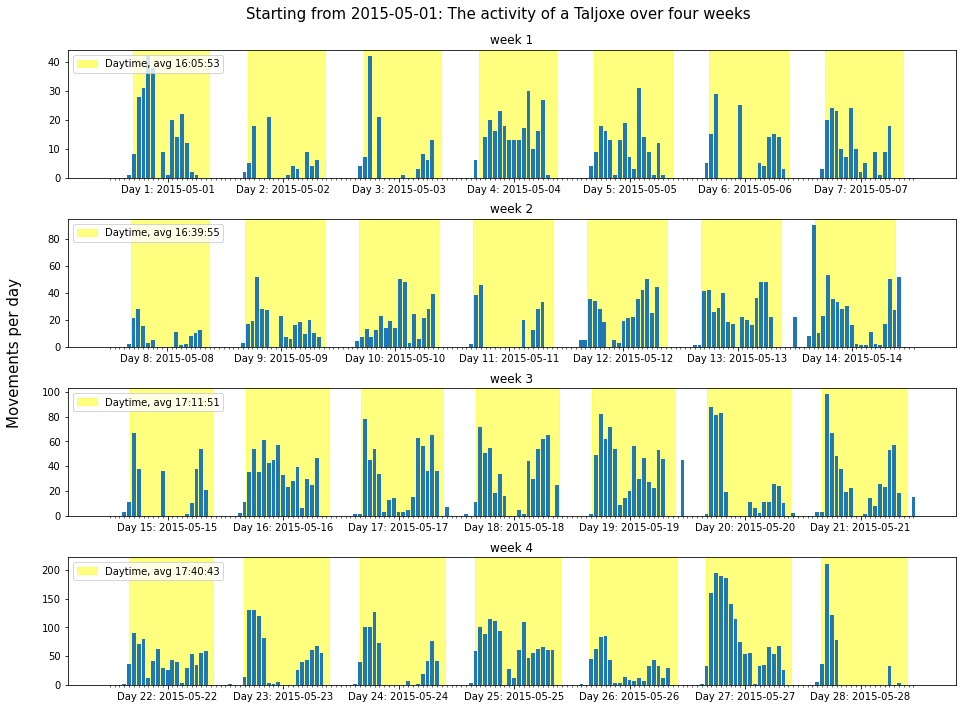

In [198]:
data=taljoxe.plot_month(dt)
print(data)

#### Plotting the bird's activity: A year

Would you like to have the values of the y-axis to be the same? yes/no: yes
Figure(936x720)


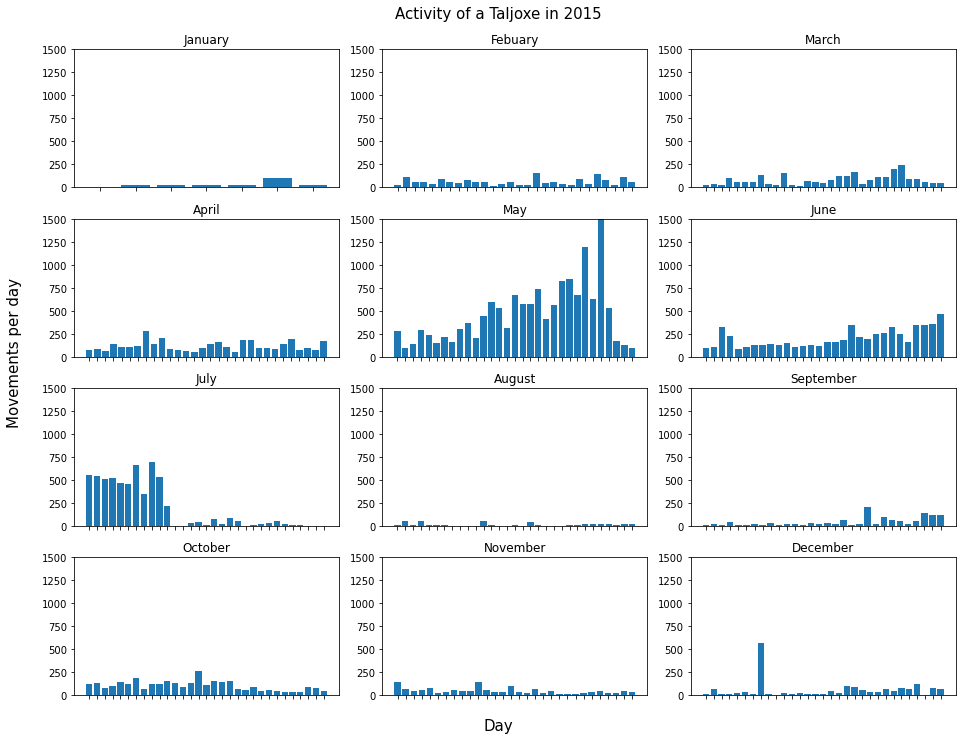

In [195]:
data=taljoxe.plot_year(dt)
print(data)